# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
#url for weather map api
weather_map_url = f'https://api.openweathermap.org/data/2.5/weather?&units=imperial&appid={weather_api_key}'
#create lists/columns
city_name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

#counter to get a record and set number
record = 1
record_set = 1

#print statement for data retrieval
print('Beginning Data Retrieval')
print('-----------------------------')
#test pull to see where to grab the data from the json
# test = requests.get(f'{weather_map_url}&q={cities[1]}').json()
# print(f'{weather_map_url}&q={cities[1]}')
# print(cities[1])
# print(json.dumps(test, sort_keys=True,indent=4))
#notes for appending, split by '$'
# coord, lat $ coord, lon $ main, temp_max $  main - humidity $ clouds, all $ wind, speed $ sys,country $ date = dt $

#loop with try/except
#try to append cities with values needed | except if no values found
for city in cities:
    try:
        #pull info of each city from api into json
        response = requests.get(f'{weather_map_url}&q={city}').json()
        
        #append to each list except for city
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        #if count record hits 50 then move to next set and reset count to 1, else keep counting to 50 cities
        if record > 49:
            record = 1
            record_set += 1
            city_name.append(city)
        else:
            record += 1
            city_name.append(city)
        print(f'Processing Record {record} of Set {record_set} | {city}')
    except:
        print('City not found. Skipping...')
print('''-----------------------------
Data Retrieval Complete      
-----------------------------''')

Beginning Data Retrieval
-----------------------------
Processing Record 2 of Set 1 | avarua
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | leningradskiy
Processing Record 5 of Set 1 | atuona
Processing Record 6 of Set 1 | sao filipe
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | lata
Processing Record 10 of Set 1 | butaritari
Processing Record 11 of Set 1 | clyde river
Processing Record 12 of Set 1 | strezhevoy
Processing Record 13 of Set 1 | severo-kurilsk
Processing Record 14 of Set 1 | rio gallegos
Processing Record 15 of Set 1 | souillac
Processing Record 16 of Set 1 | sorland
Processing Record 17 of Set 1 | moerai
Processing Record 18 of Set 1 | sao joao dos patos
Processing Record 19 of Set 1 | menongue
Processing Record 20 of Set 1 | tiksi
Processing Record 21 of Set 1 | boddam
Processing Record 22 of Set 1 | osvaldo cruz
Processing Record 23 of Set 1 | bluff
Processing Record 24 of Set 1 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
#create dataframe
weather_df = pd.DataFrame({"City": city_name, "Lat": lat, "Lng": lng, 
                           "Max Temp": max_temp, "Humidity": humidity, "Cloudiness": cloudiness, 
                           "Wind Speed": wind_speed,"Country": country, "Date": date})
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,avarua,-21.2078,-159.7750,73.45,88,30,3.44,CK,1661752944
1,ushuaia,-54.8000,-68.3000,42.46,70,0,2.30,AR,1661752683
2,leningradskiy,69.3833,178.4167,39.81,82,65,5.93,RU,1661752945
3,atuona,-9.8000,-139.0333,77.22,74,33,21.50,PF,1661752945
4,sao filipe,14.8961,-24.4956,76.60,83,95,14.50,CV,1661752945
...,...,...,...,...,...,...,...,...,...
569,soligalich,59.0778,42.2864,74.35,47,99,4.63,RU,1661753187
570,alofi,-19.0595,-169.9187,73.29,83,40,3.44,NU,1661753187
571,nanakuli,21.3906,-158.1547,79.11,61,0,5.75,US,1661753188
572,yerbogachen,61.2767,108.0108,47.64,68,95,13.53,RU,1661753188


In [9]:
#export to csv
weather_df.to_csv('output/CityWeatherOutputs.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
high_humidity = weather_df[(weather_df['Humidity'] > 100)]
high_humidity

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


there are no cities with humidity > 100%

In [11]:
weather_df.Humidity.unique()

array([ 88,  70,  82,  74,  83,  97,  71, 100,  78,  95,  76,  86,  81,
        55,  35,  68,  79,  80,  27,  31,  33,  62,  94,  61,  96,  43,
        99,  89,  84,  48,  66,  73,  56,  72,  67,  87,  92,  53,  75,
        60,  10,  91,  54,  59,  77,  52,  85,  34,  28,  50,  90,  65,
        63,  47,  69,  16,  45,  51,  58,  29,  98,  30,  36,  25,  64,
        37,   9,  19,  42,  38,  40,  49,  14,  46,  22,  12,  21,  32,
        93,  44,  17,  41,  57,  13,  23,  20], dtype=int64)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [12]:
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,avarua,-21.2078,-159.7750,73.45,88,30,3.44,CK,1661752944
1,ushuaia,-54.8000,-68.3000,42.46,70,0,2.30,AR,1661752683
2,leningradskiy,69.3833,178.4167,39.81,82,65,5.93,RU,1661752945
3,atuona,-9.8000,-139.0333,77.22,74,33,21.50,PF,1661752945
4,sao filipe,14.8961,-24.4956,76.60,83,95,14.50,CV,1661752945


In [13]:
#grabbing the date, turning it into an actual date for plot titles
from datetime import datetime
#notes to self for links i used to find what i needed
# https://www.w3schools.com/python/python_datetime.asp
# https://stackoverflow.com/questions/2623156/how-to-convert-the-integer-date-format-into-yyyymmdd
#grab the max of the date column to use as the most recent date
most_recent = weather_df.Date.max()
most_recent
convert_most_recent = datetime.utcfromtimestamp(most_recent)
convert_most_recent
year_date_convert = convert_most_recent.strftime('%Y-%m-%d')
year_date_convert

'2022-08-29'

## Latitude vs. Temperature Plot

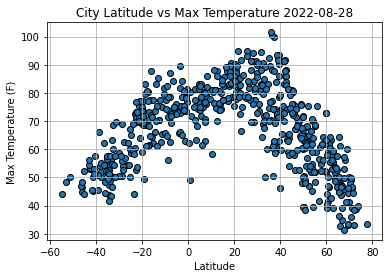

In [32]:
plt.scatter(weather_df['Lat'],weather_df['Max Temp'], edgecolors='black')
plt.title(f'City Latitude vs Max Temperature {year_date_convert}')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(True)
#save to outputs/images folder
plt.savefig('output/Chart Images/city_latitude_vs_max_temp.png')
plt.show()

## Latitude vs. Temperature Scatter Plot Analysis
From the randomly generated cities from all over world, I grabbed the temperatures of each city to create a scatter plot between the cities latitude vs the temperature. According to the data visualized, we can infer by the arc provided that all the cities towards the middle have higher temperatures and temperatures start falling the further away you get from latitude 0. The northern hemisphere, the positive latitudes, also have a faster decrease in temperature showing that the cities in the north hemisphere are colder than cities in the south. 

## Latitude vs. Humidity Plot

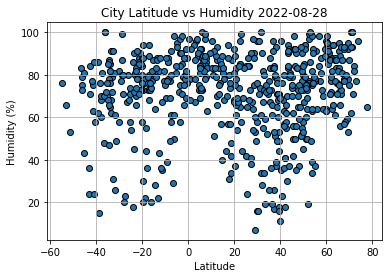

In [33]:
plt.scatter(weather_df['Lat'],weather_df['Humidity'], edgecolors='black')
plt.title(f'City Latitude vs Humidity {year_date_convert}')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)
#save to outputs/images folder
plt.savefig('output/Chart Images/city_latitude_vs_humidity.png')
plt.show()

## City Latitude vs Humidity Scatter Plot Analysis 
From the randomly generated cities from all over world, I grabbed the humidity of each city to create a scatter plot between the cities latitude vs the humidity. From the scatter plot I created above, we can see that there isn't much of correlation between a cities location and the humidity. 

## Latitude vs. Cloudiness Plot

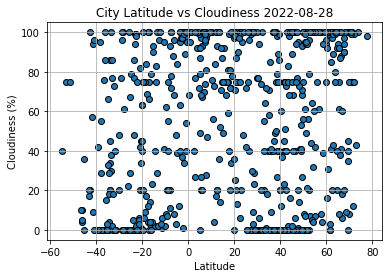

In [35]:
plt.scatter(weather_df['Lat'],weather_df['Cloudiness'], edgecolors='black')
plt.title(f'City Latitude vs Cloudiness {year_date_convert}')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)
#save to outputs/images folder
plt.savefig('output/Chart Images/city_latitude_vs_cloudiness.png')
plt.show()

## City Latitude vs Cloudiness Scatter Plot Analysis
From the randomly generated cities from all over world, I grabbed the cloudiness of each city to create a scatter plot between the cities latitude vs the cloudiness. Just like the scatter plot from latitude vs humidity, there is no correlation between a cities location and its cloudiness percent.

## Latitude vs. Wind Speed Plot

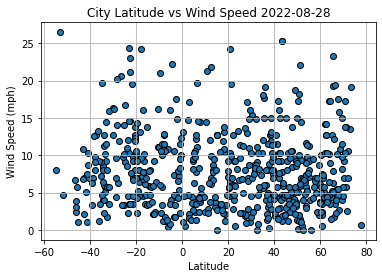

In [36]:
plt.scatter(weather_df['Lat'],weather_df['Wind Speed'], edgecolors='black')
plt.title(f'City Latitude vs Wind Speed {year_date_convert}')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)
#save to outputs/images folder
plt.savefig('output/Chart Images/city_latitude_vs_Wind Speed.png')
plt.show()

## City Latitude vs Wind Speed Scatter Plot Analysis
From the randomly generated cities from all over world, I grabbed the wind speed of each city to create a scatter plot between the cities latitude vs the wind speed. From the data I visualized above, we can see again that there is not a direct correlation between the cities location and the wind speed.

## Linear Regression

In [14]:
#seperate north and south hemisphere into its own data frames
north_hem = weather_df.loc[weather_df['Lat'] > 0]
                    #north_hem.Lat.unique() no negative lats
south_hem = weather_df.loc[weather_df['Lat'] < 0]
                    #south_hem.Lat.unique() no positive lats
#get linear regression
#make a linear regression define function and plot to not do the same thing 8 times
def plot_lin_regression(x_values,y_values,xtitle,ytitle,x_coord, y_coord):
    #lin regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_value = x_values * slope + intercept
    line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(rvalue)
    print(line_equation)
    #plotting
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_value, 'r-')
    plt.annotate(line_equation, (x_coord, y_coord), fontsize = 20, color = "red")
    #for some reason the annotate isnt working sometimes so i have also printed the line equation
    plt.xlabel(xtitle)
    plt.ylabel(ytitle)
    plt.grid(True)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

-0.7393371746098131
y = -0.53x + 90.04


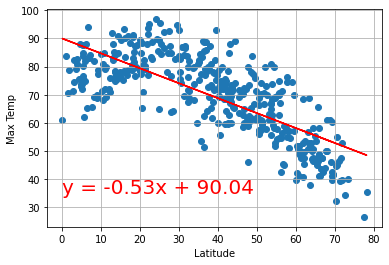

In [25]:
x_values = north_hem['Lat']
y_values = north_hem['Max Temp']

plot_lin_regression(x_values, y_values, 'Latitude', 'Max Temp', 0,35)
plt.savefig('output/Chart Images/regress_north_max_temp.png')
plt.show()

According to the linear regression above, we can see that the further away from 0 you go, the colder
it'll get.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

0.7360973871604269
y = 0.73x + 81.43


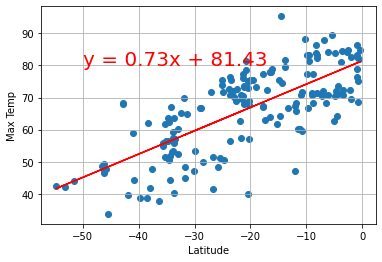

In [26]:
x_values = south_hem['Lat']
y_values = south_hem['Max Temp']

plot_lin_regression(x_values, y_values, 'Latitude', 'Max Temp', -50, 80)
plt.savefig('output/Chart Images/regress_south_max_temp.png')
plt.show()

According to the linear regression above, we can see that the further away from 0 you go, the warmer
it'll get.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

-0.030598913162036643
y = -0.03x + 71.14


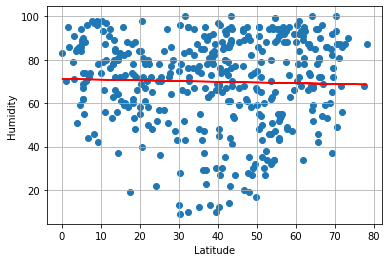

In [27]:
x_values = north_hem['Lat']
y_values = north_hem['Humidity']

plot_lin_regression(x_values, y_values, 'Latitude', 'Humidity', 10, 4)
plt.savefig('output/Chart Images/regress_north_humidity.png')
plt.show()

From the linear regression, there is no correlation, but the humidity stays semi-consistent around 70% in the north hemisphere.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

0.014842783641937798
y = 0.02x + 71.08


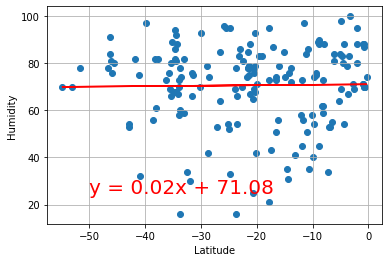

In [28]:
x_values = south_hem['Lat']
y_values = south_hem['Humidity']

plot_lin_regression(x_values, y_values, 'Latitude', 'Humidity', -50, 25)
plt.savefig('output/Chart Images/regress_south_humidity.png')
plt.show()

From the chart above, the humidity tends to stay around 70% just like the north hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

0.0491592874489827
y = 0.1x + 54.18


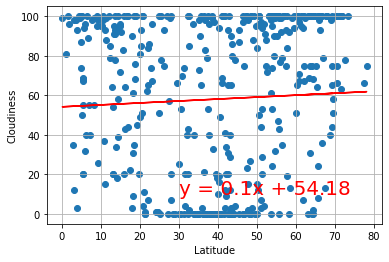

In [29]:
x_values = north_hem['Lat']
y_values = north_hem['Cloudiness']

plot_lin_regression(x_values, y_values, 'Latitude', 'Cloudiness', 30, 10)
plt.savefig('output/Chart Images/regress_north_cloudiness.png')
plt.show()

There is nothing to be grabbed from the linear regression as the range of cloudiness is too broad in the north hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

0.1575501417306
y = 0.43x + 57.52


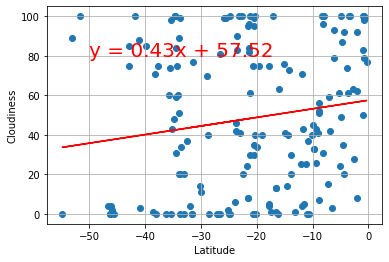

In [30]:
x_values = south_hem['Lat']
y_values = south_hem['Cloudiness']

plot_lin_regression(x_values, y_values, 'Latitude', 'Cloudiness', -50, 80)
plt.savefig('output/Chart Images/regress_south_cloudiness.png')
plt.show()

Unlike the north hemisphere, we can infer fromt the chart above that the cloudiness percentage increases the closer you get to 0.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

0.13010511123075033
y = 0.03x + 6.09


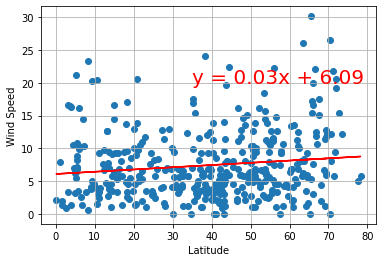

In [31]:
x_values = north_hem['Lat']
y_values = north_hem['Wind Speed']

plot_lin_regression(x_values, y_values, 'Latitude', 'Wind Speed', 35, 20)
plt.savefig('output/Chart Images/regress_north_wind.png')
plt.show()

From the data visualized above, the wind speed tends consistantly stays around four to seven miles per hour.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

-0.10228767861545356
y = -0.04x + 7.52


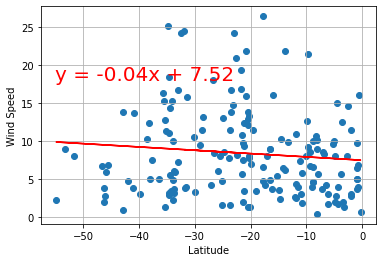

In [32]:
x_values = south_hem['Lat']
y_values = south_hem['Wind Speed']

plot_lin_regression(x_values, y_values, 'Latitude', 'Wind Speed', -55, 18)
plt.savefig('output/Chart Images/regress_south_wind.png')
plt.show()

In the south hemisphere, the wind speeds are all over the place but seems to get more consistent as you get closer to the equator.